<H1> PROJECT PATTERN RECOGNITION - LAB 2021/2022 - BREAST CANCER DATASET

<p> Creator Κωνσταντινος Παπη ΤΠ4720 <p>

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
import statistics as st
from sklearn.metrics import precision_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore') # σε περιπτωση που θα μας συστησει μια μεθοδο καλυτερα απο αυτην που μας βολευει
#και δεν θελουμε να εχει αυτο το κοκκινο warning απο κατω!

In [2]:
bst_cr = pd.read_csv('breastcancer.csv')

In [3]:
bst_cr.head(50)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
# gia na bgaloume ta paidia me to erwtimatiko kai  meta na upologisoume
# to mean value
dropped = bst_cr['Bare Nuclei'].drop(index = bst_cr[bst_cr['Bare Nuclei'] == '?'].index).astype(int)
dropped.head(30) 

0      1
1     10
2      2
3      4
4      1
5     10
6     10
7      1
8      1
9      1
10     1
11     1
12     3
13     3
14     9
15     1
16     1
17     1
18    10
19     1
20    10
21     7
22     1
24     1
25     7
26     1
27     1
28     1
29     1
30     1
Name: Bare Nuclei, dtype: int32

In [5]:
st.mean(dropped) #upologismos tou mean value xwris to '?'

3.5446559297218156

In [6]:
bst_cr['Bare Nuclei'] = bst_cr['Bare Nuclei'].replace(['?'],[3.5446559297218156]).astype(float)
bst_cr['Bare Nuclei'].head(620) # antikatastasi tou mean value 

0       1.000000
1      10.000000
2       2.000000
3       4.000000
4       1.000000
         ...    
615     1.000000
616     1.000000
617     3.544656
618     1.000000
619     1.000000
Name: Bare Nuclei, Length: 620, dtype: float64

In [7]:
bst_cr.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


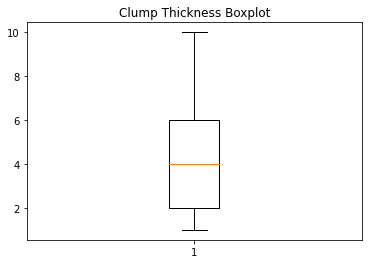

In [8]:
fig1,ax1 = plt.subplots()
ax1.set_title('Clump Thickness Boxplot')
ax1.boxplot(bst_cr['Clump Thickness']);

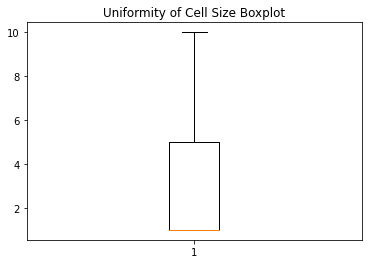

In [9]:
fig1,ax1 = plt.subplots()
ax1.set_title('Uniformity of Cell Size Boxplot')
ax1.boxplot(bst_cr['Uniformity of Cell Size']);

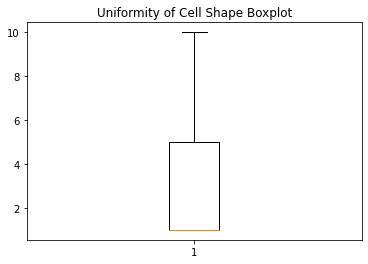

In [10]:
fig1,ax1 = plt.subplots()
ax1.set_title('Uniformity of Cell Shape Boxplot')
ax1.boxplot(bst_cr['Uniformity of Cell Shape']);

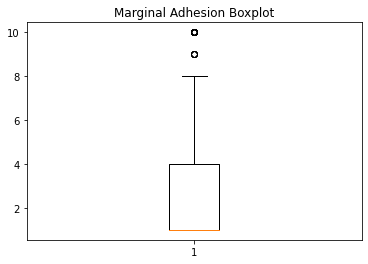

In [11]:
fig1,ax1 = plt.subplots()
ax1.set_title('Marginal Adhesion Boxplot')
ax1.boxplot(bst_cr['Marginal Adhesion']);

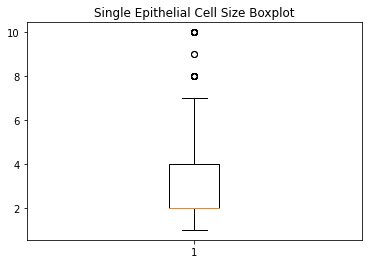

In [12]:
fig1,ax1 = plt.subplots()
ax1.set_title('Single Epithelial Cell Size Boxplot')
ax1.boxplot(bst_cr['Single Epithelial Cell Size']);

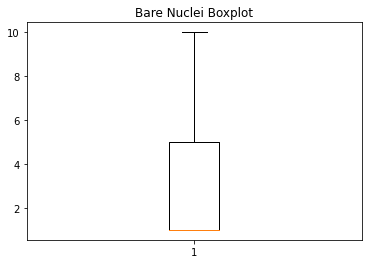

In [13]:
fig1,ax1 = plt.subplots()
ax1.set_title('Bare Nuclei Boxplot')
ax1.boxplot(bst_cr['Bare Nuclei']);

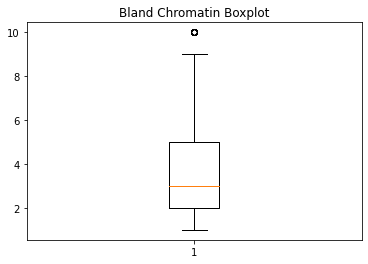

In [14]:
fig1,ax1 = plt.subplots()
ax1.set_title('Bland Chromatin Boxplot')
ax1.boxplot(bst_cr['Bland Chromatin']);

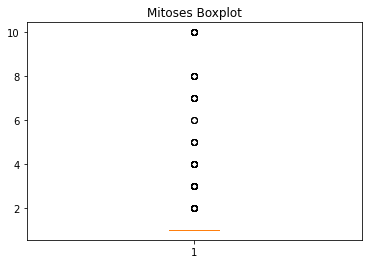

In [15]:
fig1,ax1 = plt.subplots()
ax1.set_title('Mitoses Boxplot')
ax1.boxplot(bst_cr['Mitoses']);

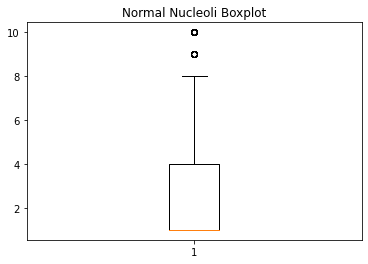

In [16]:
fig1,ax1 = plt.subplots()
ax1.set_title('Normal Nucleoli Boxplot')
ax1.boxplot(bst_cr['Normal Nucleoli']);

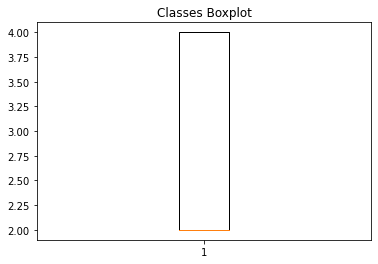

In [17]:
fig1,ax1 = plt.subplots()
ax1.set_title('Classes Boxplot')
ax1.boxplot(bst_cr['Class']);

In [18]:
bst_cr.head(1)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2


In [19]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
A_minmax_1 = min_max_scaler.fit_transform(bst_cr[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]) # it could be all the data...

In [20]:
A_minmax_1

array([[0.44444444, 0.        , 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       [0.44444444, 0.33333333, 0.33333333, ..., 0.22222222, 0.11111111,
        0.        ],
       [0.22222222, 0.        , 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       ...,
       [0.44444444, 1.        , 1.        , ..., 0.77777778, 1.        ,
        0.11111111],
       [0.33333333, 0.77777778, 0.55555556, ..., 1.        , 0.55555556,
        0.        ],
       [0.33333333, 0.77777778, 0.77777778, ..., 1.        , 0.33333333,
        0.        ]])

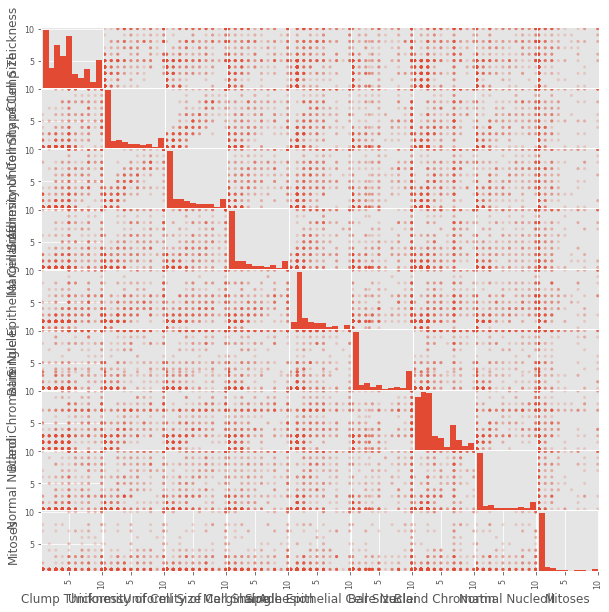

In [21]:
%matplotlib inline
plt.style.use('ggplot')
pd.plotting.scatter_matrix(bst_cr[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']], alpha=0.2, figsize=(10, 10))
plt.show()

<H3> 80/20 Split <h3>

In [22]:
X = bst_cr[['Clump Thickness','Uniformity of Cell Size',
            'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
            'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
y = bst_cr['Class']

In [23]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [24]:
X_train.shape, y_train.shape
clf = LinearDiscriminantAnalysis().fit(X_train, y_train) 
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))
conf_m = confusion_matrix(y_test, y_pred)
conf_m

0.9428571428571428


array([[87,  4],
       [ 4, 45]], dtype=int64)

In [25]:
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n');

report:
              precision    recall  f1-score   support

           2       0.96      0.96      0.96        91
           4       0.92      0.92      0.92        49

    accuracy                           0.94       140
   macro avg       0.94      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140



In [26]:
clf = QuadraticDiscriminantAnalysis().fit(X_train, y_train) 
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))
conf_m = confusion_matrix(y_test, y_pred)
conf_m

0.9071428571428571


array([[81, 10],
       [ 3, 46]], dtype=int64)

In [27]:
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           2       0.96      0.89      0.93        91
           4       0.82      0.94      0.88        49

    accuracy                           0.91       140
   macro avg       0.89      0.91      0.90       140
weighted avg       0.91      0.91      0.91       140



<h3> 90/10 Split <h3>

In [28]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X,y,test_size=0.1,random_state=5)

In [29]:
X_train.shape, y_train.shape
clf = LinearDiscriminantAnalysis().fit(X_train, y_train) 
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))
conf_m = confusion_matrix(y_test, y_pred)
conf_m

0.9


array([[41,  2],
       [ 5, 22]], dtype=int64)

In [30]:
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n');

report:
              precision    recall  f1-score   support

           2       0.89      0.95      0.92        43
           4       0.92      0.81      0.86        27

    accuracy                           0.90        70
   macro avg       0.90      0.88      0.89        70
weighted avg       0.90      0.90      0.90        70



In [31]:
clf = QuadraticDiscriminantAnalysis().fit(X_train, y_train) 
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))
conf_m = confusion_matrix(y_test, y_pred)
conf_m

0.9


array([[39,  4],
       [ 3, 24]], dtype=int64)

In [32]:
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           2       0.93      0.91      0.92        43
           4       0.86      0.89      0.87        27

    accuracy                           0.90        70
   macro avg       0.89      0.90      0.90        70
weighted avg       0.90      0.90      0.90        70



<h3> 70/30 Split <h3>

In [33]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [34]:
X_train.shape, y_train.shape
clf = LinearDiscriminantAnalysis().fit(X_train, y_train) 
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))
conf_m = confusion_matrix(y_test, y_pred)
conf_m

0.9476190476190476


array([[134,   5],
       [  6,  65]], dtype=int64)

In [35]:
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n');

report:
              precision    recall  f1-score   support

           2       0.96      0.96      0.96       139
           4       0.93      0.92      0.92        71

    accuracy                           0.95       210
   macro avg       0.94      0.94      0.94       210
weighted avg       0.95      0.95      0.95       210



In [36]:
clf = QuadraticDiscriminantAnalysis().fit(X_train, y_train) 
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))
conf_m = confusion_matrix(y_test, y_pred)
conf_m

0.919047619047619


array([[126,  13],
       [  4,  67]], dtype=int64)

In [37]:
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           2       0.97      0.91      0.94       139
           4       0.84      0.94      0.89        71

    accuracy                           0.92       210
   macro avg       0.90      0.93      0.91       210
weighted avg       0.92      0.92      0.92       210



<h3> 60/40 Split <h3>

In [38]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X,y,test_size=0.4,random_state=5)

In [39]:
X_train.shape, y_train.shape
clf = LinearDiscriminantAnalysis().fit(X_train, y_train) 
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))
conf_m = confusion_matrix(y_test, y_pred)
conf_m

0.95


array([[177,   6],
       [  8,  89]], dtype=int64)

In [40]:
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n');

report:
              precision    recall  f1-score   support

           2       0.96      0.97      0.96       183
           4       0.94      0.92      0.93        97

    accuracy                           0.95       280
   macro avg       0.95      0.94      0.94       280
weighted avg       0.95      0.95      0.95       280



In [41]:
clf = QuadraticDiscriminantAnalysis().fit(X_train, y_train) 
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))
conf_m = confusion_matrix(y_test, y_pred)
conf_m

0.9321428571428572


array([[169,  14],
       [  5,  92]], dtype=int64)

In [42]:
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           2       0.97      0.92      0.95       183
           4       0.87      0.95      0.91        97

    accuracy                           0.93       280
   macro avg       0.92      0.94      0.93       280
weighted avg       0.94      0.93      0.93       280



<h3> 50/50 Split <h3>

In [43]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X,y,test_size=0.5,random_state=5)

In [44]:
X_train.shape, y_train.shape
clf = LinearDiscriminantAnalysis().fit(X_train, y_train) 
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))
conf_m = confusion_matrix(y_test, y_pred)
conf_m

0.9514285714285714


array([[222,   6],
       [ 11, 111]], dtype=int64)

In [45]:
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n');

report:
              precision    recall  f1-score   support

           2       0.95      0.97      0.96       228
           4       0.95      0.91      0.93       122

    accuracy                           0.95       350
   macro avg       0.95      0.94      0.95       350
weighted avg       0.95      0.95      0.95       350



In [46]:
clf = QuadraticDiscriminantAnalysis().fit(X_train, y_train) 
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))
conf_m = confusion_matrix(y_test, y_pred)
conf_m

0.9428571428571428


array([[214,  14],
       [  6, 116]], dtype=int64)

In [47]:
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n');

report:
              precision    recall  f1-score   support

           2       0.97      0.94      0.96       228
           4       0.89      0.95      0.92       122

    accuracy                           0.94       350
   macro avg       0.93      0.94      0.94       350
weighted avg       0.94      0.94      0.94       350



<h3> 40/60 Split <h3>

In [48]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X,y,test_size=0.6,random_state=5)

In [49]:
X_train.shape, y_train.shape
clf = LinearDiscriminantAnalysis().fit(X_train, y_train) 
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))
conf_m = confusion_matrix(y_test, y_pred)
conf_m

0.9571428571428572


array([[273,   6],
       [ 12, 129]], dtype=int64)

In [50]:
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n');

report:
              precision    recall  f1-score   support

           2       0.96      0.98      0.97       279
           4       0.96      0.91      0.93       141

    accuracy                           0.96       420
   macro avg       0.96      0.95      0.95       420
weighted avg       0.96      0.96      0.96       420



In [51]:
clf = QuadraticDiscriminantAnalysis().fit(X_train, y_train) 
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))
conf_m = confusion_matrix(y_test, y_pred)
conf_m

0.930952380952381


array([[255,  24],
       [  5, 136]], dtype=int64)

In [52]:
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n');

report:
              precision    recall  f1-score   support

           2       0.98      0.91      0.95       279
           4       0.85      0.96      0.90       141

    accuracy                           0.93       420
   macro avg       0.92      0.94      0.92       420
weighted avg       0.94      0.93      0.93       420



<h3> 30/70 Split <h3>

In [53]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X,y,test_size=0.7,random_state=5)

In [54]:
X_train.shape, y_train.shape
clf = LinearDiscriminantAnalysis().fit(X_train, y_train) 
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))
conf_m = confusion_matrix(y_test, y_pred)
conf_m

0.9571428571428572


array([[317,   7],
       [ 14, 152]], dtype=int64)

In [55]:
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n');

report:
              precision    recall  f1-score   support

           2       0.96      0.98      0.97       324
           4       0.96      0.92      0.94       166

    accuracy                           0.96       490
   macro avg       0.96      0.95      0.95       490
weighted avg       0.96      0.96      0.96       490



In [56]:
clf = QuadraticDiscriminantAnalysis().fit(X_train, y_train) 
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))
conf_m = confusion_matrix(y_test, y_pred)
conf_m

0.9428571428571428


array([[300,  24],
       [  4, 162]], dtype=int64)

In [57]:
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n');

report:
              precision    recall  f1-score   support

           2       0.99      0.93      0.96       324
           4       0.87      0.98      0.92       166

    accuracy                           0.94       490
   macro avg       0.93      0.95      0.94       490
weighted avg       0.95      0.94      0.94       490



<h3> 20/80 Split <h3>

In [58]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X,y,test_size=0.8,random_state=5)

In [59]:
X_train.shape, y_train.shape
clf = LinearDiscriminantAnalysis().fit(X_train, y_train) 
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))
conf_m = confusion_matrix(y_test, y_pred)
conf_m

0.9553571428571429


array([[355,  12],
       [ 13, 180]], dtype=int64)

In [60]:
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n');

report:
              precision    recall  f1-score   support

           2       0.96      0.97      0.97       367
           4       0.94      0.93      0.94       193

    accuracy                           0.96       560
   macro avg       0.95      0.95      0.95       560
weighted avg       0.96      0.96      0.96       560



In [61]:
clf = QuadraticDiscriminantAnalysis().fit(X_train, y_train) 
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))
conf_m = confusion_matrix(y_test, y_pred)
conf_m

0.9375


array([[333,  34],
       [  1, 192]], dtype=int64)

In [62]:
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n');

report:
              precision    recall  f1-score   support

           2       1.00      0.91      0.95       367
           4       0.85      0.99      0.92       193

    accuracy                           0.94       560
   macro avg       0.92      0.95      0.93       560
weighted avg       0.95      0.94      0.94       560



<h3> 10/90 Split <h3>

In [63]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X,y,test_size=0.9,random_state=5)

In [64]:
X_train.shape, y_train.shape
clf = LinearDiscriminantAnalysis().fit(X_train, y_train) 
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))
conf_m = confusion_matrix(y_test, y_pred)
conf_m

0.946031746031746


array([[402,  13],
       [ 21, 194]], dtype=int64)

In [65]:
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n');

report:
              precision    recall  f1-score   support

           2       0.95      0.97      0.96       415
           4       0.94      0.90      0.92       215

    accuracy                           0.95       630
   macro avg       0.94      0.94      0.94       630
weighted avg       0.95      0.95      0.95       630



In [66]:
clf = QuadraticDiscriminantAnalysis().fit(X_train, y_train) 
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))
conf_m = confusion_matrix(y_test, y_pred)
conf_m

0.9507936507936507


array([[384,  31],
       [  0, 215]], dtype=int64)

In [67]:
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n');

report:
              precision    recall  f1-score   support

           2       1.00      0.93      0.96       415
           4       0.87      1.00      0.93       215

    accuracy                           0.95       630
   macro avg       0.94      0.96      0.95       630
weighted avg       0.96      0.95      0.95       630



<H3> UNSUPERVISED LEARNING <H3>

In [68]:
X = bst_cr[['Clump Thickness','Uniformity of Cell Size',
            'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
            'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
y = bst_cr['Class']

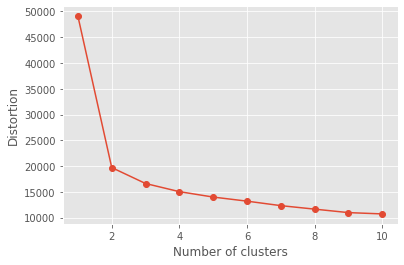

In [70]:
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
 km = KMeans(
 n_clusters=i, init='random',
 n_init=10, max_iter=300,
 tol=1e-04, random_state=0
 )
 km.fit(X)
 distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


In [71]:
kmeans = KMeans(n_clusters = 10,random_state=0).fit(X) #Χρησιμοποιουμε τον αλγοριθμο k-means
centers = kmeans.cluster_centers_ # βρισκουμε το κεντρο απο καθε feature 
centers

array([[1.78066914, 1.11152416, 1.18587361, 1.13754647, 1.97769517,
        1.30818551, 2.00743494, 1.06319703, 1.07434944],
       [8.        , 8.95833333, 8.54166667, 4.375     , 6.66666667,
        9.16666667, 6.125     , 2.        , 1.58333333],
       [7.59259259, 8.62962963, 8.37037037, 5.66666667, 5.25925926,
        3.02017244, 7.51851852, 8.07407407, 1.81481481],
       [7.72972973, 5.72972973, 5.56756757, 3.18918919, 4.7027027 ,
        6.8672787 , 5.40540541, 8.67567568, 1.89189189],
       [7.79166667, 4.875     , 5.125     , 4.04166667, 5.16666667,
        2.81436066, 4.41666667, 2.91666667, 2.95833333],
       [6.69047619, 4.04761905, 4.5952381 , 3.02380952, 3.88095238,
        9.45238095, 4.57142857, 3.11904762, 1.38095238],
       [7.79166667, 9.41666667, 9.        , 7.70833333, 8.20833333,
        8.04166667, 7.08333333, 8.66666667, 8.33333333],
       [4.62637363, 1.42857143, 1.60989011, 1.51098901, 2.1043956 ,
        1.34963719, 2.1043956 , 1.4010989 , 1.04945055],


In [72]:
#y_predicted = kmeans.fit_predict(X)
y_predicted = kmeans.fit_predict(X) # κανουμε τα prediction και βλεπουμε σε ποιες ομαδες μπαινουν μαζι τα δεδομενα
y_predicted

array([7, 5, 0, 3, 7, 9, 5, 0, 0, 7, 0, 0, 7, 0, 8, 4, 7, 7, 1, 7, 8, 3,
       0, 4, 0, 5, 0, 7, 0, 0, 0, 0, 4, 0, 0, 0, 2, 7, 8, 5, 2, 4, 1, 4,
       2, 0, 3, 0, 7, 3, 4, 7, 3, 8, 1, 3, 3, 4, 5, 4, 3, 0, 1, 3, 0, 4,
       7, 3, 3, 0, 7, 6, 0, 8, 4, 0, 0, 7, 0, 0, 0, 7, 7, 0, 9, 6, 5, 9,
       7, 0, 0, 0, 7, 0, 0, 0, 0, 7, 6, 9, 3, 7, 7, 4, 6, 4, 1, 9, 0, 3,
       0, 5, 8, 1, 7, 0, 7, 8, 0, 0, 0, 7, 1, 5, 9, 0, 8, 0, 5, 0, 7, 0,
       9, 0, 0, 7, 7, 0, 7, 0, 0, 0, 4, 0, 0, 0, 5, 0, 7, 6, 0, 5, 2, 7,
       0, 5, 0, 0, 0, 6, 3, 7, 0, 0, 7, 7, 9, 4, 0, 0, 0, 0, 0, 6, 5, 9,
       0, 2, 7, 5, 0, 0, 7, 9, 5, 0, 9, 6, 9, 0, 9, 9, 7, 0, 0, 7, 3, 7,
       0, 0, 3, 1, 0, 7, 0, 9, 1, 0, 0, 7, 6, 9, 0, 6, 9, 2, 0, 0, 2, 7,
       0, 3, 7, 5, 3, 0, 3, 2, 0, 9, 3, 9, 4, 5, 7, 7, 6, 2, 6, 5, 7, 0,
       0, 0, 0, 7, 9, 5, 7, 0, 0, 8, 5, 1, 1, 5, 0, 0, 0, 5, 8, 6, 9, 8,
       4, 7, 1, 5, 2, 0, 3, 7, 5, 7, 0, 0, 0, 0, 0, 4, 0, 0, 8, 5, 8, 9,
       6, 0, 3, 9, 0, 0, 3, 5, 0, 8, 3, 7, 7, 8, 2,

In [73]:
X['cluster']=y_predicted# προσθετουμε τα clusters διπλα απο τα values των Rl και Na
#Τα σπαμε ανα cluster
filtered_label1 = X[X.cluster == 0]
filtered_label2 = X[X.cluster == 1]
filtered_label3 = X[X.cluster == 2]
filtered_label4 = X[X.cluster == 3]
filtered_label5 = X[X.cluster == 4]
filtered_label6 = X[X.cluster == 5]
filtered_label7 = X[X.cluster == 6]
filtered_label8 = X[X.cluster == 7]
filtered_label9 = X[X.cluster == 8]
filtered_label10 = X[X.cluster == 9]

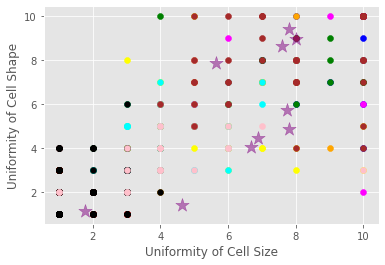

In [74]:
#Plotting τα αποτελεσματα
plt.scatter(filtered_label1['Uniformity of Cell Size'] , filtered_label1['Uniformity of Cell Shape'], color = 'red')
plt.scatter(filtered_label2['Uniformity of Cell Size'], filtered_label2['Uniformity of Cell Shape'] , color = 'blue')
plt.scatter(filtered_label3['Uniformity of Cell Size'] , filtered_label3['Uniformity of Cell Shape'] , color = 'green')
plt.scatter(filtered_label4['Uniformity of Cell Size'] , filtered_label4['Uniformity of Cell Shape'] , color = 'yellow')
plt.scatter(filtered_label5['Uniformity of Cell Size'] , filtered_label5['Uniformity of Cell Shape'], color = 'orange')
plt.scatter(filtered_label6['Uniformity of Cell Size'] , filtered_label6['Uniformity of Cell Shape'], color = 'cyan')
plt.scatter(filtered_label7['Uniformity of Cell Size'] , filtered_label7['Uniformity of Cell Shape'], color = 'magenta')
plt.scatter(filtered_label8['Uniformity of Cell Size'] , filtered_label8['Uniformity of Cell Shape'], color = 'black')
plt.scatter(filtered_label9['Uniformity of Cell Size'] , filtered_label9['Uniformity of Cell Shape'], color = 'pink')
plt.scatter(filtered_label10['Uniformity of Cell Size'] , filtered_label10['Uniformity of Cell Shape'], color = 'brown')


plt.scatter(centers[:,0], centers[:,1], c='purple', s=200, alpha=0.5,marker='*');#Plot τα κεντρα των ομαδων αντιστοιχα
plt.xlabel('Uniformity of Cell Size')
plt.ylabel('Uniformity of Cell Shape')
plt.show()

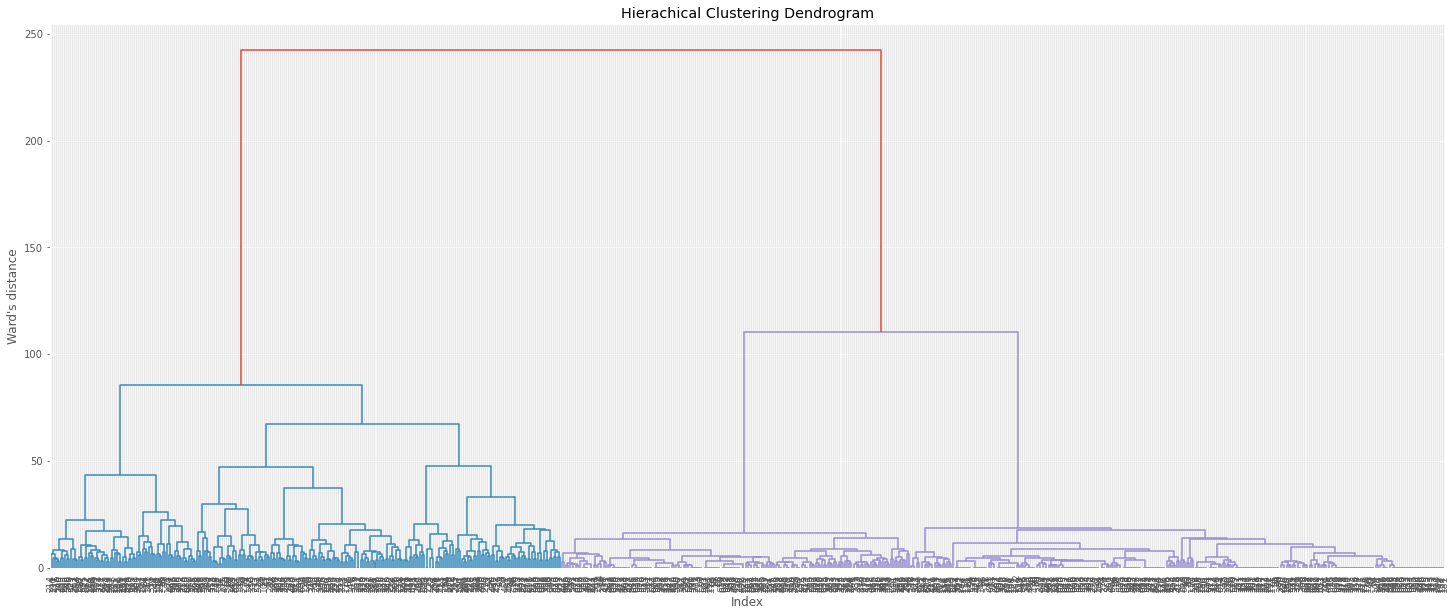

In [75]:
from scipy.cluster.hierarchy import ward, dendrogram,linkage 
np.set_printoptions(precision=4, suppress=True)
distance = linkage(X, 'ward') #Χρησιμοποιουμε την μεθοδο ward για να κανουμε το Linkage και μετα να 
#δημιουργηθει το δεντρογραμμα

# Dendrogram
plt.figure(figsize=(25,10))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(distance,leaf_rotation=90.,leaf_font_size=9.,);

<p> Παρατειρουμε οτι το Hierarchy Clustering βαζει 2 ομαδες 2 clusters ενω εμεις βαλαμε 10 στο K-Means για να δουμε με πιο λεπτομερια πως θα γινοντουσαν πιο βαθιες ομαδες πως θα ηταν σε ενα γραφημα αλλιως κανονικα μεσο της γραφου στο Κ-Means παρατηρουμε οτι θα χρειαζοντουσαν 2 ομαδες<p>

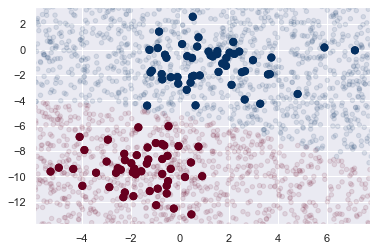

In [95]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);


rng = np.random.RandomState(5)

Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);